# Customer Churn Prediction for GNB Bank

## Group Members


## 1. Introduction

GNB Bank is a leading financial institution, providing various banking and financial services to its customers. As with any bank, customer retention is crucial for maintaining a strong market presence and sustaining profitability. Identifying customers who are likely to churn is of paramount importance for GNB Bank to implement targeted strategies and retain valuable customers. In this notebook, we will explore a dataset containing customer information, including demographics, banking behavior, and historical churn data. Our objective is to build a predictive model that can accurately predict customer churn and provide valuable insights to help GNB Bank enhance its customer retention efforts.

## 2. Business Understanding

For GNB Bank, understanding and predicting customer churn is critical for several reasons. First and foremost, customer churn impacts the bank's revenue and profitability. Acquiring new customers is more expensive than retaining existing ones, so preventing churn can lead to significant cost savings. Moreover, customer retention contributes to a positive reputation and strengthens the bank's position in the highly competitive financial industry. By leveraging machine learning techniques to predict customer churn, GNB Bank can proactively address the needs of at-risk customers, personalize their banking experience, and develop targeted marketing campaigns to foster long-term customer loyalty.

## 3. Problem Statement

The goal of this project is to build an accurate customer churn prediction model for GNB Bank. Specifically, we aim to develop a machine learning model that can predict whether a customer is likely to churn or not based on their historical behavior and demographic information. The project involves the following tasks:

Exploratory Data Analysis (EDA): We will explore the dataset to gain insights into customer demographics, banking behavior, and the distribution of churned customers. EDA will help us understand the data and identify patterns that may be indicative of churn.

Data Preprocessing: We will handle missing values, encode categorical variables, and perform feature scaling to prepare the data for model training.

Feature Importance Analysis: Using SHAP (SHapley Additive exPlanations), we will identify the most important features that influence customer churn for GNB Bank.

Model Building: We will train and evaluate two machine learning models - Decision Trees and Random Forests - to predict customer churn accurately.

Model Evaluation: The performance of the models will be assessed using various evaluation metrics, such as accuracy, F1 score, precision, recall, and the ROC-AUC curve.

Interpretation and Recommendations: We will interpret the model results to identify key factors contributing to customer churn for GNB Bank. Based on the insights gained, we will provide actionable recommendations to the bank on strategies to reduce churn and improve customer retention.

By completing these tasks, we aim to deliver a robust customer churn prediction model that will enable GNB Bank to make data-driven decisions, enhance customer satisfaction, and strengthen its market position in the competitive financial industry.

**1.RowNumber:** A sequential number assigned to each row in the dataset.

**2.CustomerId:** A unique identifier for each customer in the bank.

**3.Surname:** The last name of the customer.

**4.CreditScore:** The credit score of the customer, representing their creditworthiness.

**5.Geography:** The geographical location of the customer (e.g., France, Spain, Germany).

**6.Gender:** The gender of the customer (Male or Female).

**7.Age:** The age of the customer.

**8.Tenure:** The number of years the customer has been with the bank.

**9.Balance:** The account balance of the customer.

**10.NumOfProducts:** The number of bank products the customer has purchased.

**11.HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).

**12.IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).

**13.EstimatedSalary:** The estimated salary of the customer.

**14.Exited:** The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 4. Data Understanding

### 4.1 Importing the relevant libraries

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### 4.2 Loading the Data

In [40]:
data = pd.read_csv("Churn Modeling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Hypothesis Testing

In [43]:
# Hypothesis: Higher credit scores are associated with lower churn rates
# Null Hypothesis(Ho): Credit scores have no effect on customer churn rates
# Alternative hypothesis(H1): Higher credit are associated with lower church rates

# Extract data for each group (churned and not churned)
credit_churned = data[data['Exited'] == 1]['CreditScore']
credit_not_churned = data[data['Exited'] == 0]['CreditScore']

# Perform t-test to compare means
t_stat, p_value = stats.ttest_ind(credit_churned, credit_not_churned)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Determine significance level (e.g., 0.05)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in credit scores between churned and not churned customers.")

T-Statistic: -2.7100778888729833
P-Value: 0.006738213892192373
Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.


## 7. Data Cleaning

In [44]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Outliers:
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
7             8    15656148     Obinna          376   Germany  Female   29   
942         943    15804586        Lin          376    France  Female   46   
1193       1194    15779947     Thomas          363     Spain  Female   28   
1405       1406    15612494  Panicucci          359    France  Female   44   
1631       1632    15685372   Azubuike          350     Spain    Male   54   
1838       1839    15758813   Campbell          350   Germany    Male   39   
1962       1963    15692416  Aikenhead          358     Spain  Female   52   
2473       2474    15679249       Chou          351   Germany  Female   57   
2579       2580    15597896   Ozoemena          365   Germany    Male   30   
8154       8155    15791533     Ch'ien          367     Spain    Male   42   
8723       8724    15803202  Onyekachi          350    France    Male   51   
8762       8763    15765173        Lin          350   

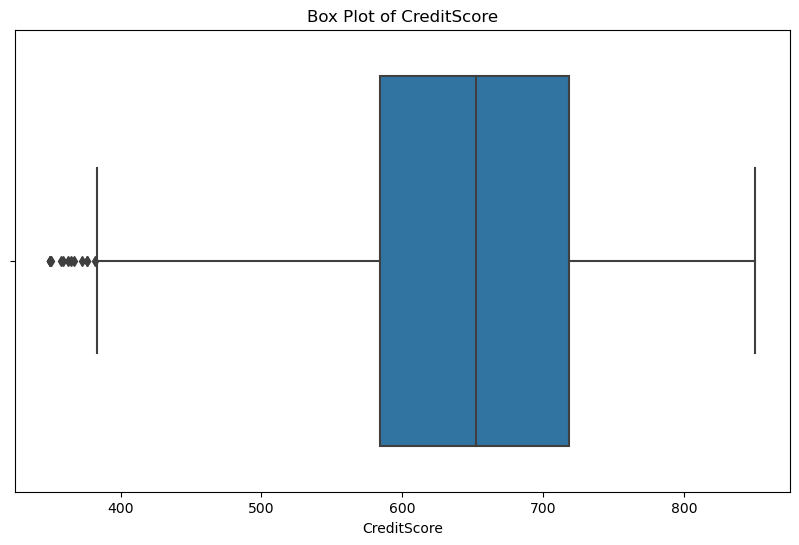

In [45]:
column_to_check = 'CreditScore'

# Calculate quartiles and IQR
Q1 = data[column_to_check].quantile(0.25)
Q3 = data[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and visualize outliers
outliers = data[(data[column_to_check] < lower_bound) | (data[column_to_check] > upper_bound)]
print("Outliers:")
print(outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data[column_to_check])
plt.title(f"Box Plot of {column_to_check}")
plt.show()

## 8. Feature Engineering

In [46]:
# Bin 'CreditScore' into three categories: Low, Medium, High
bins = [0, 600, 700, 850]
labels = ['Low', 'Medium', 'High']
data['CreditScore_Category'] = pd.cut(data['CreditScore'], bins=bins, labels=labels)

In [47]:
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Medium
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Low
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Medium
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,High
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Medium
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,High
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Low
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Low
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Medium
